In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'data/flights.csv'
flights_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [4]:
# Identify all columns with null values
flights_df.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [5]:
flights_df[flights_df['DepDel15'].isnull()]['DepDelay']

171       0
359       0
429       0
545       0
554       0
         ..
271410    0
271607    0
271634    0
271671    0
271885    0
Name: DepDelay, Length: 2761, dtype: int64

In [9]:
flights_df['DepDel15'].fillna(0, inplace=True)

In [ ]:
# Calculate the 90th percentile of DepDelay
percentile_90 = flights_df['DepDelay'].quantile(0.90)

# Filter the DataFrame to remove rows where DepDelay is higher than the 90th percentile
filtered_df = flights_df[flights_df['DepDelay'] <= percentile_90]

# Display the first few rows of the filtered DataFrame
filtered_df.head(100)

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0
7,2013,7,28,7,EV,12264,Washington Dulles International,Washington,DC,14524,Richmond International,Richmond,VA,2218,4,0.0,2301,15,1,0
8,2013,10,8,2,AA,13930,Chicago O'Hare International,Chicago,IL,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,1010,8,0.0,1240,-10,0,0
10,2013,6,9,7,OO,12892,Los Angeles International,Los Angeles,CA,14679,San Diego International,San Diego,CA,1404,3,0.0,1507,-8,0,0
11,2013,7,21,7,AA,13204,Orlando International,Orlando,FL,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,930,10,0.0,1110,-4,0,0


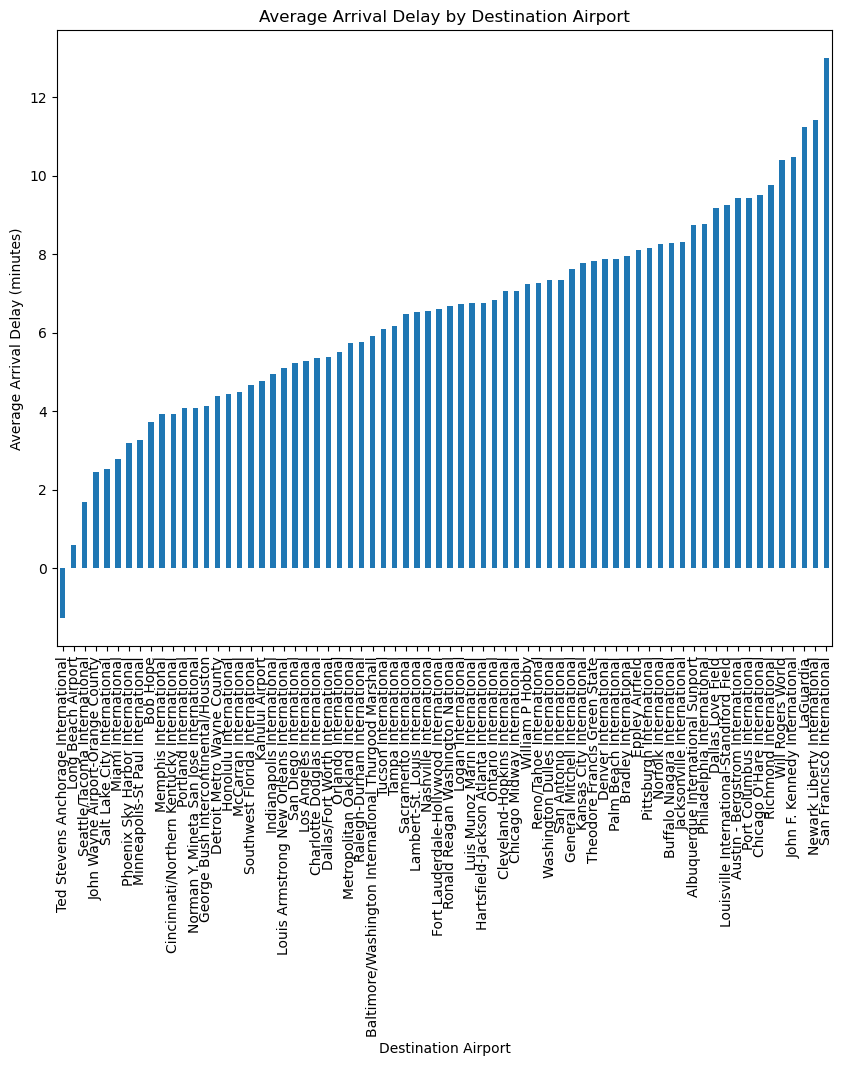

In [11]:
import matplotlib.pyplot as plt

# Calculate the average ArrDelay by DestAirportName
avg_arr_delay = flights_df.groupby('DestAirportName')['ArrDelay'].mean().sort_values()

# Plot the bar chart
plt.figure(figsize=(10, 8))
avg_arr_delay.plot(kind='bar')
plt.title('Average Arrival Delay by Destination Airport')
plt.xlabel('Destination Airport')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=90)
plt.show()

In [12]:
# List the column names of the dataset
flights_df.columns.tolist()

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'Carrier',
 'OriginAirportID',
 'OriginAirportName',
 'OriginCity',
 'OriginState',
 'DestAirportID',
 'DestAirportName',
 'DestCity',
 'DestState',
 'CRSDepTime',
 'DepDelay',
 'DepDel15',
 'CRSArrTime',
 'ArrDelay',
 'ArrDel15',
 'Cancelled']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare the data
X = flights_df[['DayOfWeek', 'DestAirportID']]
y = flights_df['ArrDel15']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train the logistic regression model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

0.7847466352871957

In [22]:
# Define the input data for a flight to Las Vegas (DestAirportID: 12892) on a Monday (DayOfWeek: 1)
las_vegas_monday = pd.DataFrame({'DayOfWeek': [1], 'DestAirportID': [12892]})

# Predict the probability of delay
prob_delay = model.predict_proba(las_vegas_monday)[0][1]

# Calculate the odds
odds_delay = prob_delay / (1 - prob_delay)

print(f'The odds that a flight to Las Vegas on a Monday will be delayed: {odds_delay:.2f}')

The odds that a flight to Las Vegas on a Monday will be delayed: 0.27


In [ ]:
# Get unique values for OriginAirportName and OriginAirportID
unique_airports = flights_df[['OriginAirportName', 'OriginAirportID']].drop_duplicates()

# Export to CSV
unique_airports.to_csv('data/airports.csv', index=False)

In [24]:
import joblib

# Save the model to a file
joblib_file = "data/model.pkl"
joblib.dump(model, joblib_file)

['data/model.pkl']